## Getting the Sequences 

### It does not appear that there is any reference to the riboswitch sequences' location online for download. Reading them manually from the paper's figures:

**Table 1. Riboswitch Sequence **



|Riboswitch | <div style="text-align: left">Sequence (5'->)</div>                                                                    |
|----------|-------------------------------------------------------------------------------------------------------------------|
|<div style="text-align: left">YES-1</div>|<div style="text-align: left">GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC</div>|
|<div style="text-align: left">NOT-1</div>|<div style="text-align: left">GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC</div>                    |
|<div style="text-align: left">AND-1</div>|<div style="text-align: left">GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU</div>|
|<div style="text-align: left">OR-1</div>|<div style="text-align: left">GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC</div>        |


**Table 2. Riboswitch Annotation **

| Riboswitch | OBS-1 Bases (5'->) | OBS-2 Bases (5'->) | Switch Site  (5'->)|Swith Site Complement (5'->)|
|-----------------|--------------------|--------------------|--------------------------|----------------------|
|<div style="text-align: left">YES-1</div>|<div style="text-align: center">26 - 47</div>|<div style="text-align: center">N/A</div>| <div style="text-align: center">16 - 21</div>|<div style="text-align: center">49 - 54</div>|
|<div style="text-align: left">NOT-1</div>|<div style="text-align: center">44 - 66</div>|<div style="text-align: center">N/A</div>|<div style="text-align: center">40 - 43</div>|<div style="text-align: center">74 - 77</div>| 
|<div style="text-align: left">AND-1</div>|<div style="text-align: center">30 - 45</div>|<div style="text-align: center">49 - 64</div>|<div style="text-align: center">16 -23</div>|<div style="text-align: center">70 - 78</div>|
|<div style="text-align: left">OR-1</div>|<div style="text-align: center">27 - 46</div>|<div style="text-align: center">46 - 66</div>|<div style="text-align: center">16 - 27</div> |<div style="text-align: center">67 - 77</div>|


# Folding the RNA sequences using RNAfold

In [2]:
import subprocess

yes1 = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
not1 = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC'
and1 = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
or1 = 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

switch_seqs = [yes1, not1, and1, or1]
names = ['YES-1', 'NOT-1', 'AND-1', 'OR-1']
for i in range(len(switch_seqs)):
    folded_seq = subprocess.run('RNAfold', input=bytes(switch_seqs[i], 'ascii'), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    print('Here is the RNAfold output for the ' + names[i] + ' riboswitch:')
    print(folded_seq.stderr.decode())
    print(folded_seq.stdout.decode())
    


Here is the RNAfold output for the YES-1 riboswitch:

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)

Here is the RNAfold output for the NOT-1 riboswitch:

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)

Here is the RNAfold output for the AND-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)

Here is the RNAfold output for the OR-1 riboswitch:

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).)))))..

# Comparing the RNAfold output against the Pechovsky paper for YES-1



Populating the interactive namespace from numpy and matplotlib


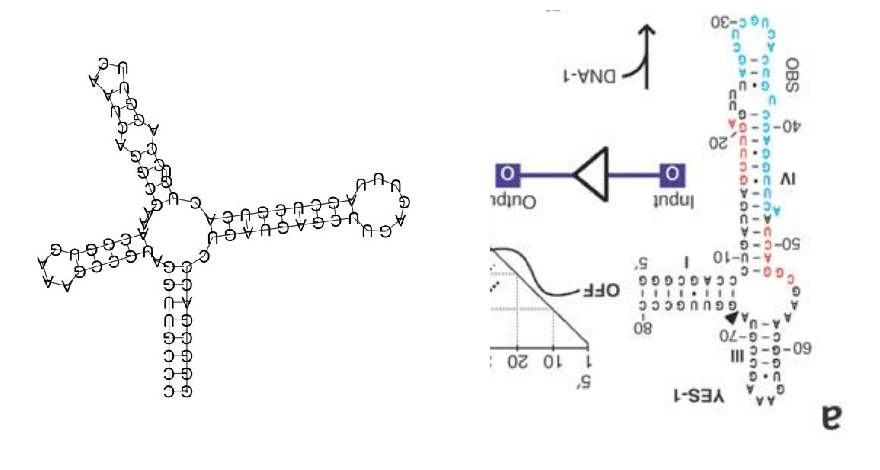

In [130]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1=mpimg.imread('yes1_predicted.jpg')
img2=mpimg.imread('yes1_paper.jpg')


fig = plt.figure(figsize(15,10))
fig.add_subplot(1,2, 1)
plt.imshow(np.rot90(img1,2))
plt.axis('off')
fig.add_subplot(1,2, 2)
plt.imshow(np.rot90(img2,2))
plt.axis('off')
plt.show(block=True)


#plt.subplots(figsize = (15,10))

#imgplot= [plt.imshow(img1),plt.imshow(img2)]


In [123]:
yes1_constraints = ''
for i in range(len(yes1)):
    if (i + 1 >= 26) and (i + 1 <= 47):
        yes1_constraints = yes1_constraints + 'x'
    else:
        yes1_constraints = yes1_constraints + '.'
        
print(yes1_constraints)
    

.........................xxxxxxxxxxxxxxxxxxxxxx.................................


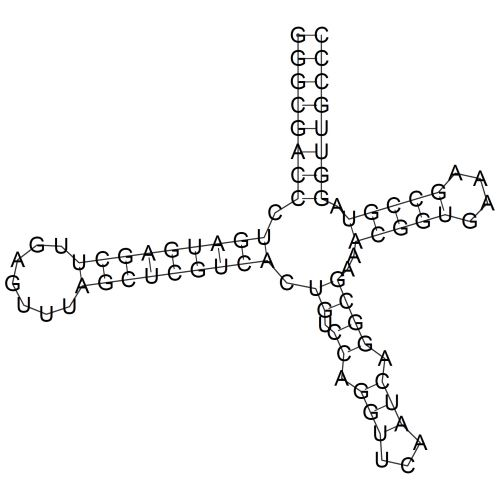

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "http://my_site.com/my_picture.jpg")

PATH = "C:/Users/cms/Desktop/BioE 231/Lab/Lab_05/"
Image(filename = PATH + "yes1_predicted.jpg", width=300, height=300)